In [2]:
pip install --upgrade numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("dataset.csv")

In [5]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [7]:
# grab the first row for the header
new_header = data.iloc[0]
data=data[1:] # take the data minus the header row
#Update the DataFrame’s column names to reflect the actual headers from the first row.
data.columns = new_header
data.reset_index(drop=True, inplace=True)
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [9]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [10]:
#Let's convert the date column into an appropriate datetime format, users and sessions to numeric and group them for further analysis
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Session primary channel group (Default channel group)  3182 non-null   object        
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   datetime64[ns]
 2   Users                                                  3182 non-null   int64         
 3   Sessions                                               3182 non-null   int64         
 4   Engaged sessions                                       3182 non-null   object        
 5   Average engagement time per session                    3182 non-null   object        
 6   Engaged sessions per user                              3182 non-null   object        
 7   Events per session                                     3182 non-null 

The overall purpose of the above operation is to prepare and summarize the dataset for time series analysis, focusing on how user engagement (through sessions) varies by time. By converting data into appropriate types and grouping it by time, we can more easily perform operations like plotting time series graphs, calculating moving averages, or applying time series forecasting models. Now, let’s analyze the total users and sessions over time:

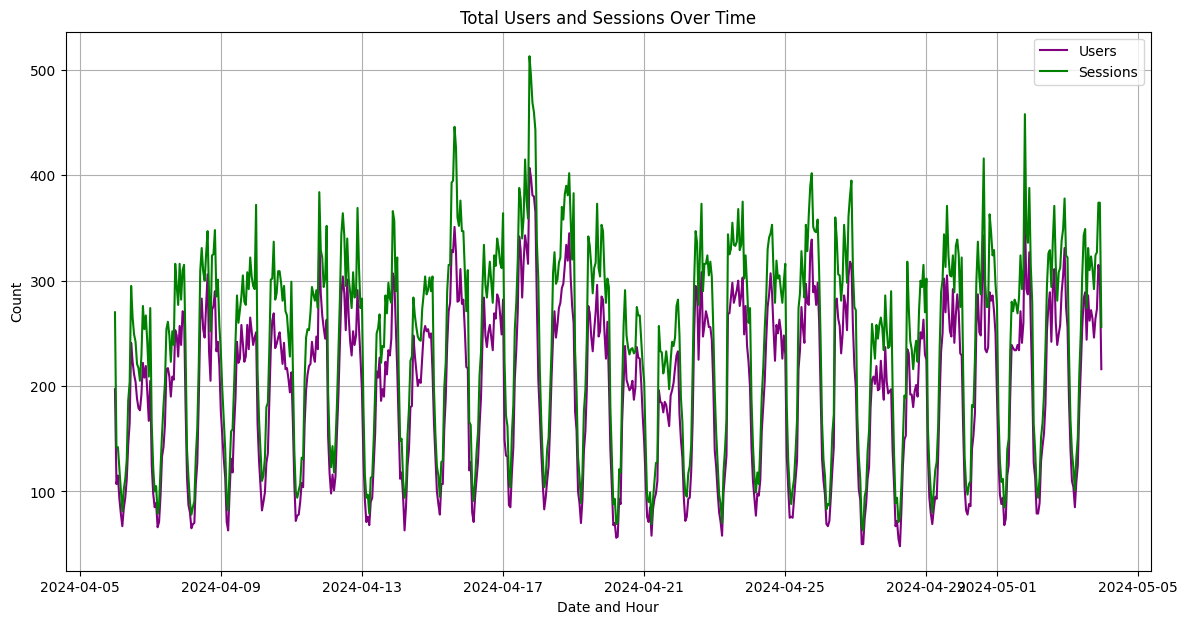

In [15]:
# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='purple')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

Now that we’ve analyzed the session trends, let’s move on to User Engagement Analysis. We will look into metrics like 
average engagement time per session, 
engagement rate, and 
events per session to evaluate how engaged users are when they visit the site:

In [16]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [17]:
# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

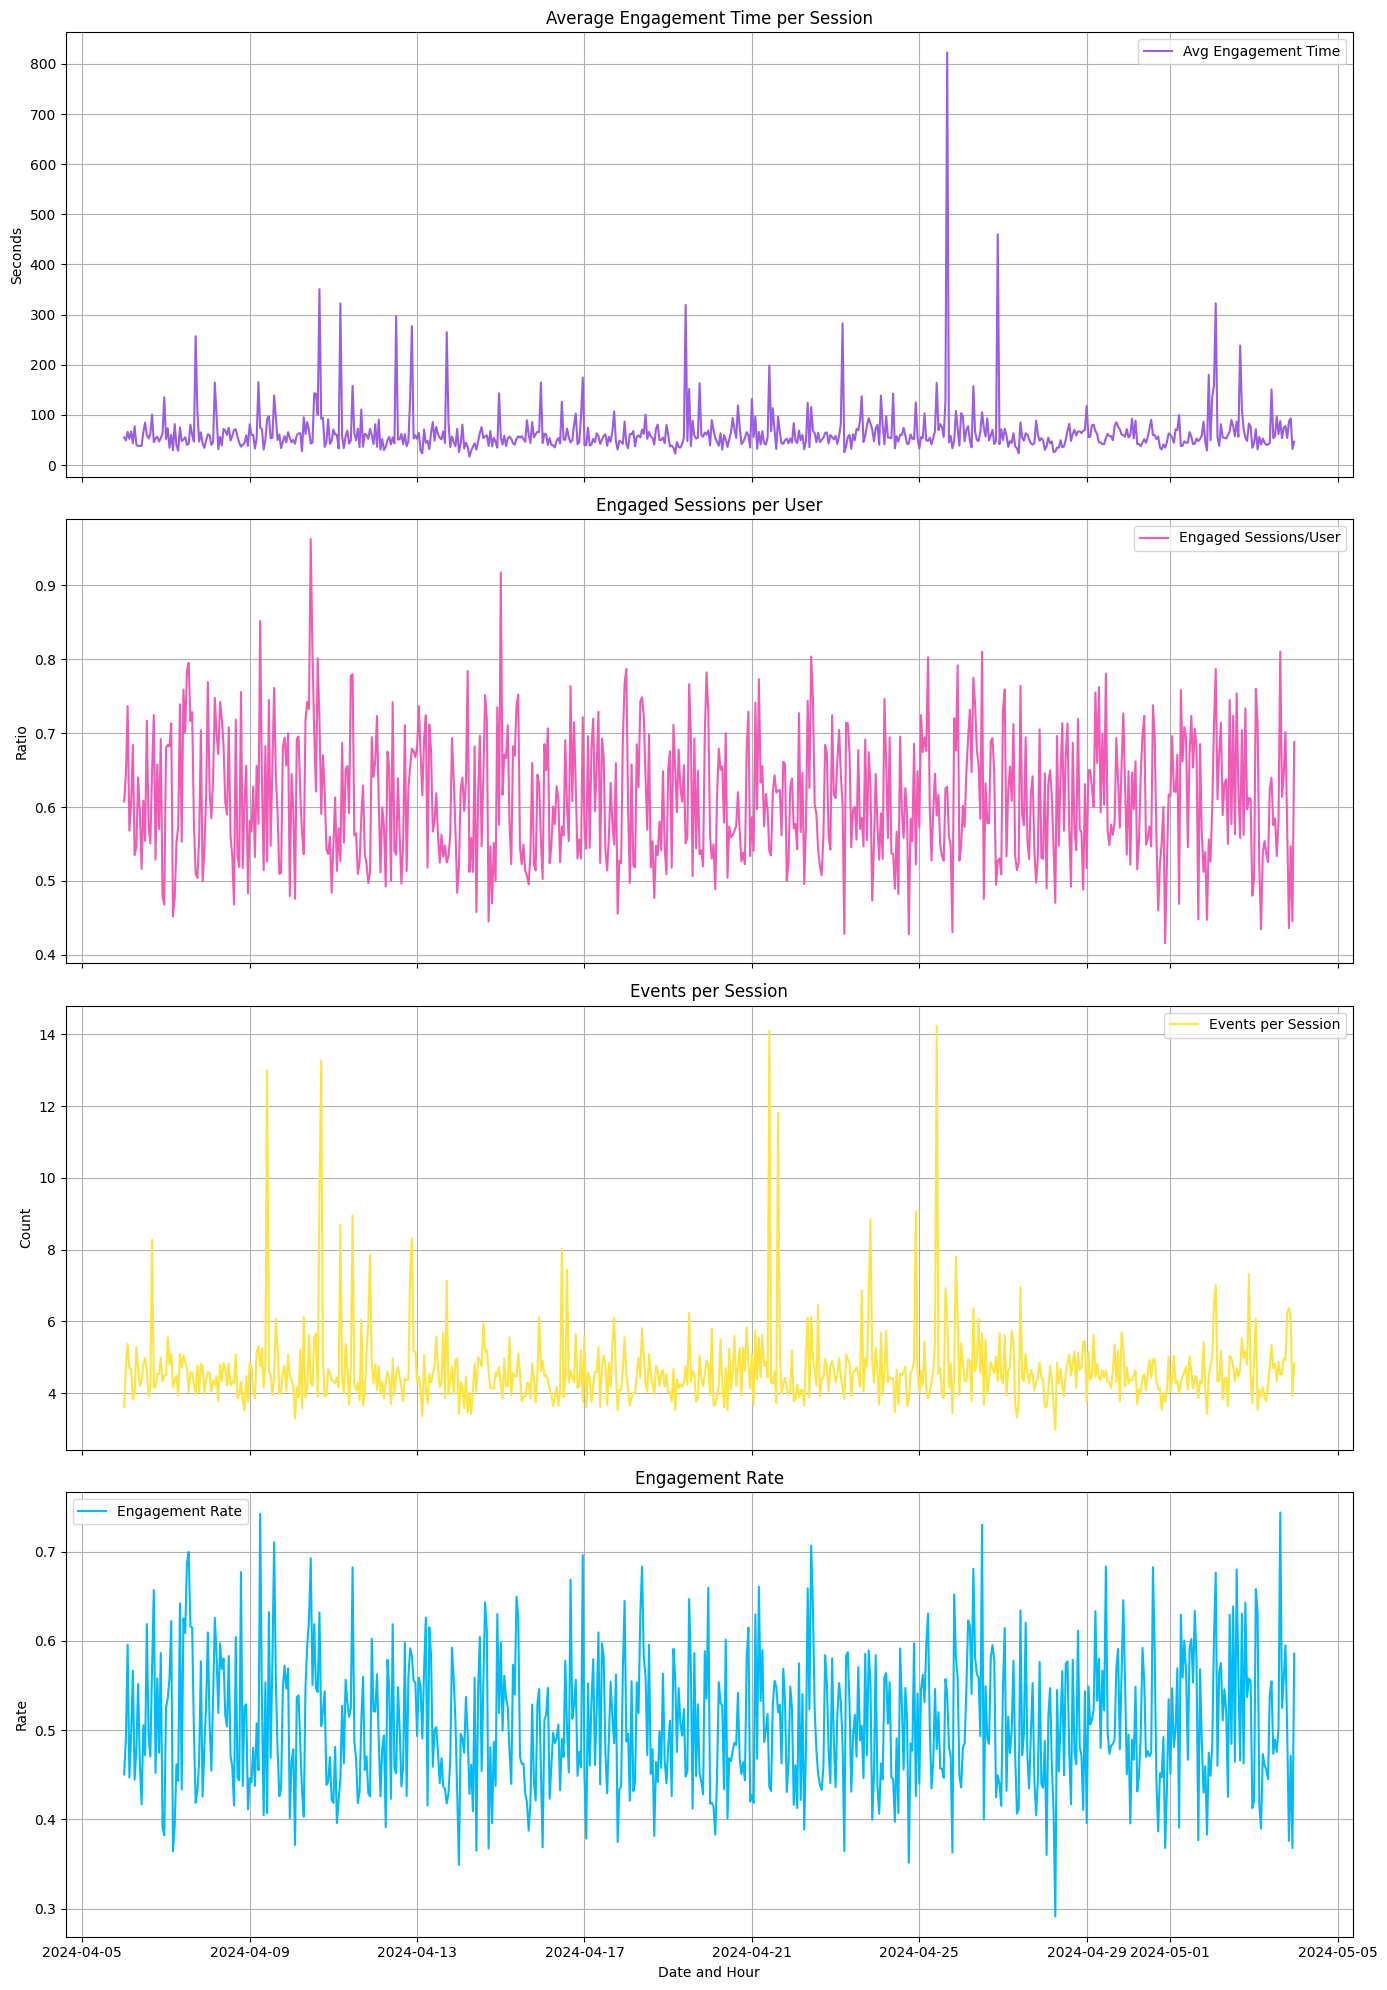

In [20]:
# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='#9b5de5')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='#f15bb5')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='#fee440')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='#00bbf9')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

The user engagement analysis provides insights into how visitors interact with the website:

1. Average Engagement Time per Session: The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.

2. Engaged Sessions per User: This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.

3. Events per Session: The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.

4. Engagement Rate: The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.

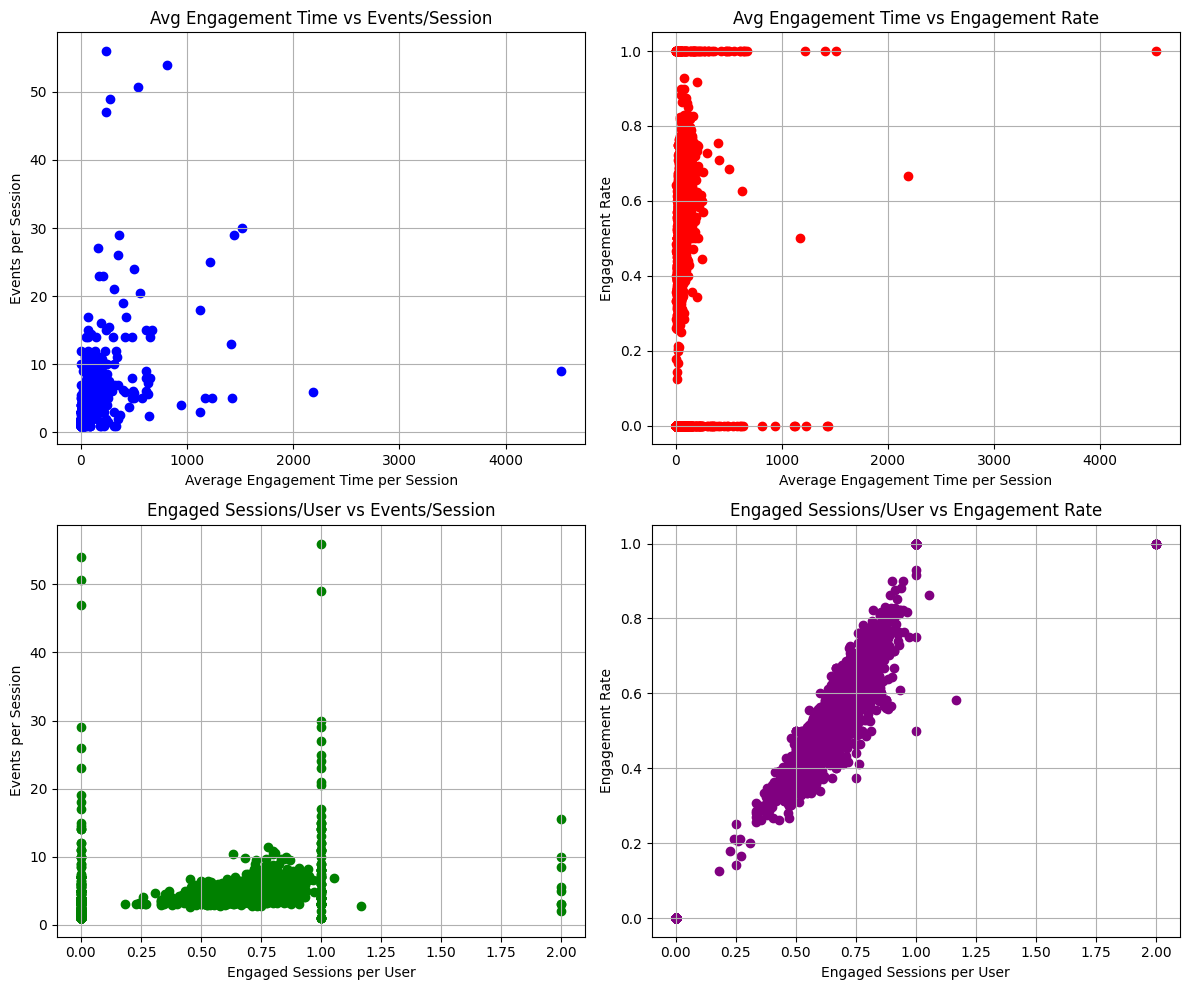

In [21]:
#Let's draw correlation among them
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Here’s what we can analyze from the above scatter plots:

1. Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.

2. Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.

3. Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.

4. Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.

Now let's proceed with the Channel Performance Analysis to assess how different marketing channels contribute to traffic and engagement. It will involve analyzing the session, user, and engagement data segmented by the marketing channel:

In [22]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

In [23]:
# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

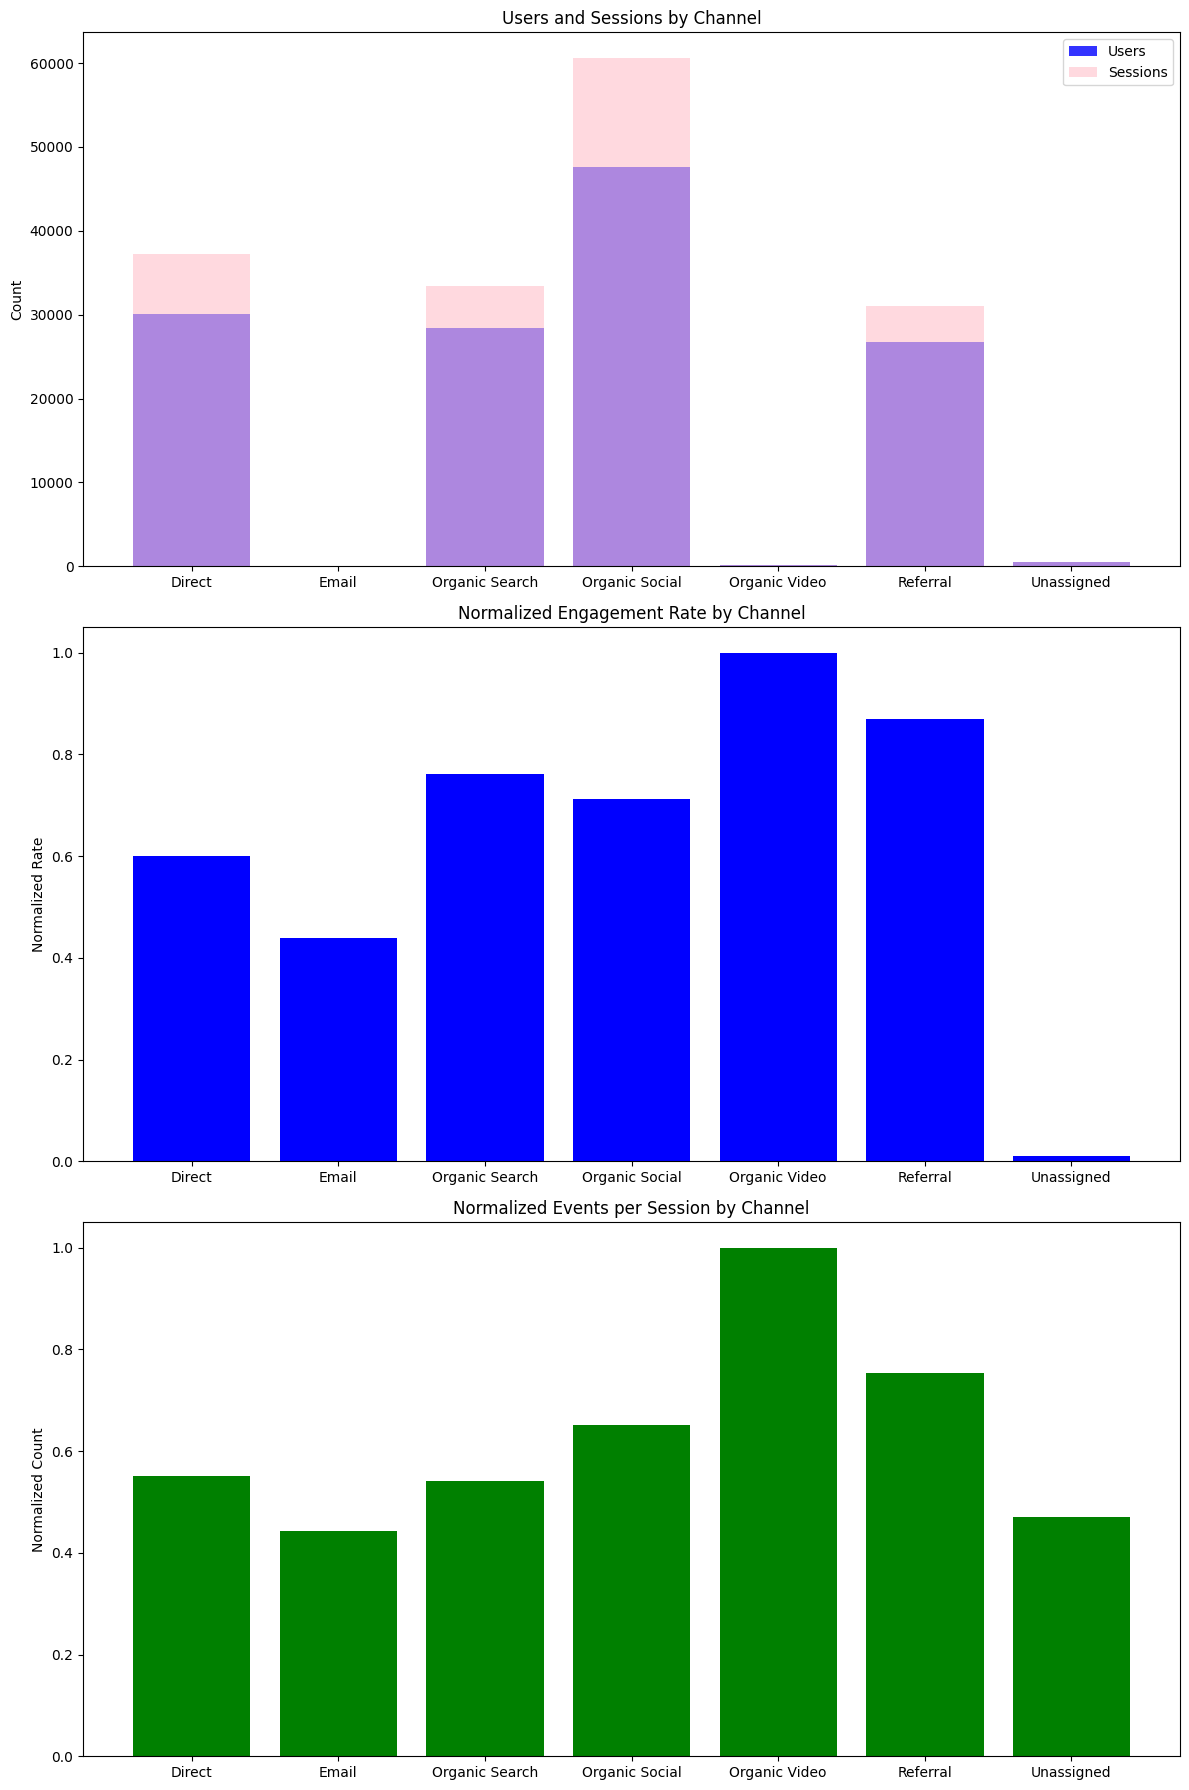

In [25]:
# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8, color='blue')
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6, color='pink')
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='blue')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

The data illustrates significant variations in performance across different channels, highlighting the strengths and weaknesses of each in driving traffic, engaging users, and encouraging interactions. The high performance of ‘Organic Social’ in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity over quality of visits. In contrast, ‘Referral’ and ‘Organic Video’ channels, while not leading in volume, excel in engaging users deeply, pointing to potential areas for leveraging these strengths in marketing strategies.